This EDA notebooks aims to have a broad understanding of the problem to be solved.

It partiallly builds on the [EDA Notebook by Oleg X@Kaggle](https://www.kaggle.com/code/allegich/arc-agi-2025-starter-notebook-eda/notebook)

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
#!pip install numpy pandas matplotlib transformers accelerate -qqq

# Libs

In [3]:
import matplotlib.pyplot as plt
from   matplotlib import colors

import numpy as np

import os.path as osp

import pandas as pd
from pprint import pprint

import sys
sys.path.append("../")

import time
from tqdm import tqdm

In [51]:
from src.config import Config
from src.utils import (load_data, 
                        plot_grid, 
                        plot_random, 
                        visualize_task, 
                        sample_arc_task, 
                        get_row_sizes,
                        reconstruct_grids)

# Load data

In [5]:
train_data, test_data = load_data(data_path=Config.data_path)

print(f"✓ Loaded {len(train_data)} training problems")
print(f"✓ Loaded {len(test_data)} test problems")

✓ Loaded 746 training problems
✓ Loaded 185 test problems


In [6]:
train_ids = list(train_data.keys())

train_ids[:5]

['train_0000', 'train_0001', 'train_0002', 'train_0003', 'train_0004']

In [7]:
example_task_id, example_task = sample_arc_task(train_data, split=None)

print(f"Sampled task: {example_task_id}")
if isinstance(example_task, dict) and len(example_task) > 1:
    print("Train examples:")
    pprint(example_task["train"])
    print("Test example:")
    pprint(example_task["test"])
else:
    pprint(example_task)


Sampled task: train_0459
Train examples:
[{'input': [[9,
             9,
             9,
             9,
             9,
             9,
             5,
             9,
             9,
             9,
             9,
             9,
             9,
             9,
             9,
             9,
             5,
             9,
             9,
             5,
             9,
             9,
             9,
             9,
             9,
             5,
             9],
            [9,
             9,
             9,
             9,
             9,
             9,
             5,
             9,
             9,
             9,
             9,
             9,
             9,
             9,
             9,
             9,
             5,
             9,
             9,
             5,
             9,
             9,
             9,
             9,
             9,
             5,
             9],
            [9,
             9,
             9,
             9,
             9,
             

# Stats

In [8]:
problem_stats = []

for sample_id in range(len(train_data)):
    sample_problem = train_ids[sample_id]
    num_train_instances = len(train_data[sample_problem]["train"])
    num_test_instances  = len(train_data[sample_problem]["test"])

    stat = {
        "sample_problem": sample_problem,
        "num_train_instances": num_train_instances,
        "num_test_instances": num_test_instances
    }

    problem_stats.append(stat)


In [9]:
problem_stats[0]

{'sample_problem': 'train_0000',
 'num_train_instances': 3,
 'num_test_instances': 1}

In [10]:
all_num_train_instances = [p["num_train_instances"] for p in problem_stats]
all_num_test_instances = [p["num_test_instances"] for p in problem_stats]

max(all_num_train_instances), min(all_num_train_instances), max(all_num_test_instances), min(all_num_test_instances)

(8, 2, 1, 1)

# Data Viz

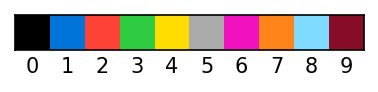

In [11]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=Config.CMAP, norm=Config.NORM)
plt.xticks(list(range(10)))
plt.yticks([])
plt.tick_params(axis='x', color='r', length=0, grid_color='none')
    
plt.show()

## Plot One Sample

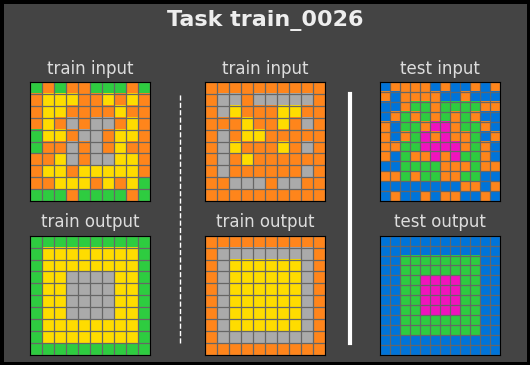

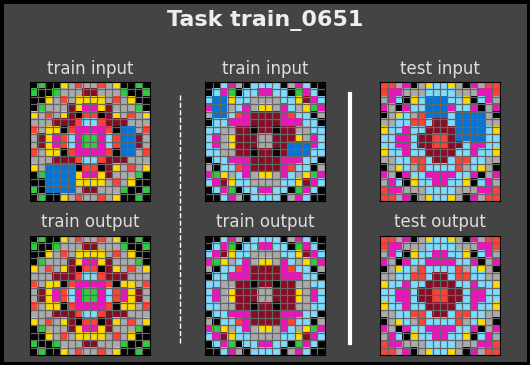

In [19]:
for _ in range(2):
    plot_random(data=train_data)

Insight: Interestingly, it seems much harder to find the transformations or rules with only one example...even by looking at the actual solution to the test input.

## Plot All Task Problems

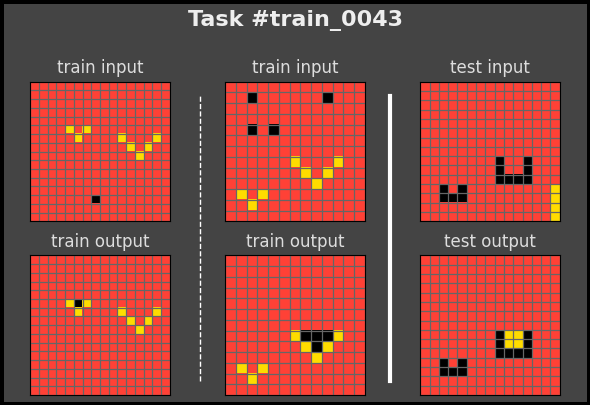

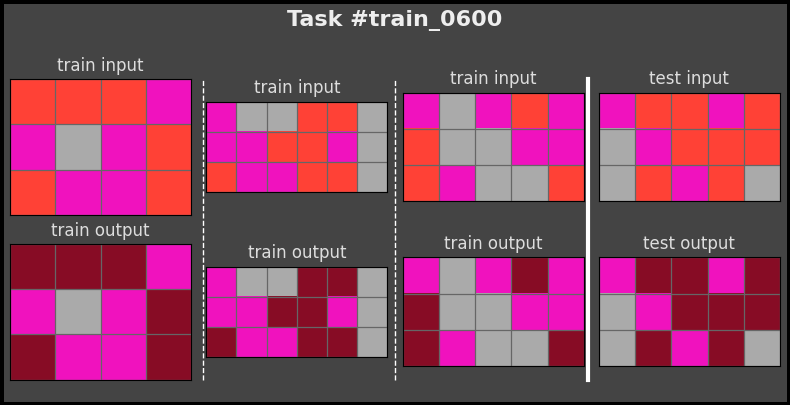

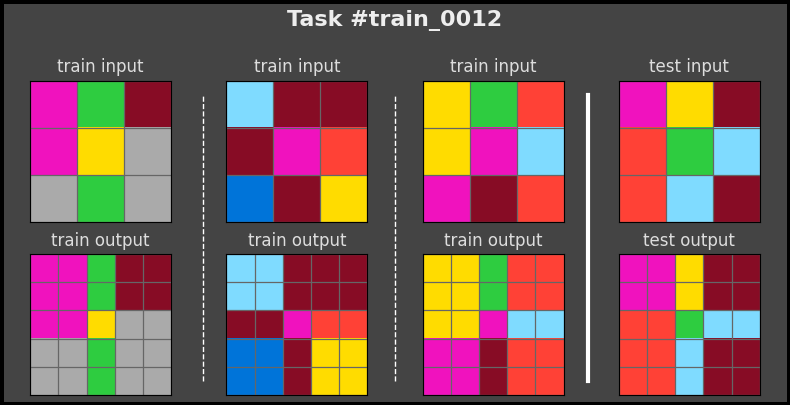

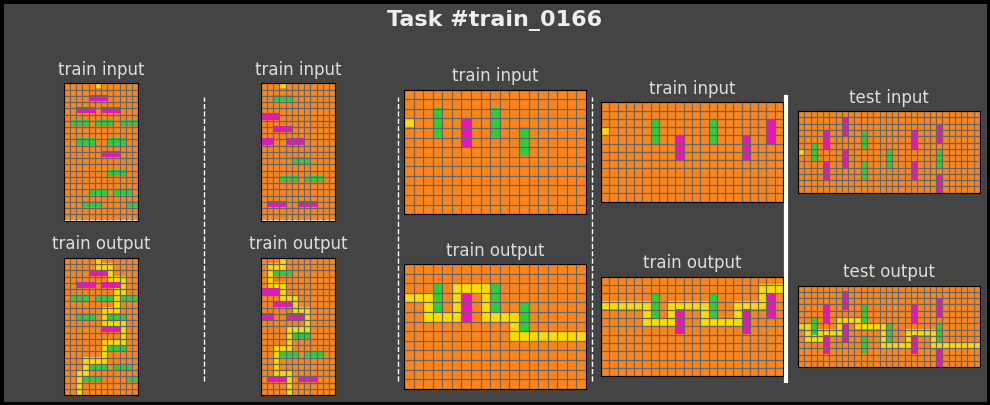

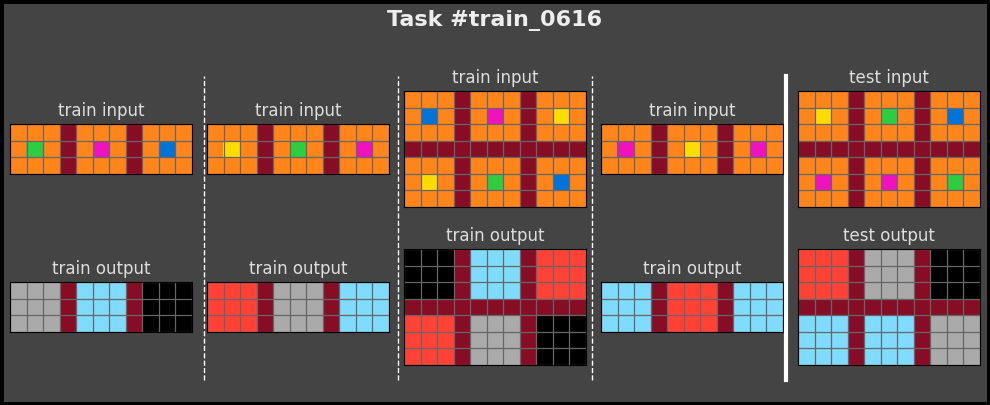

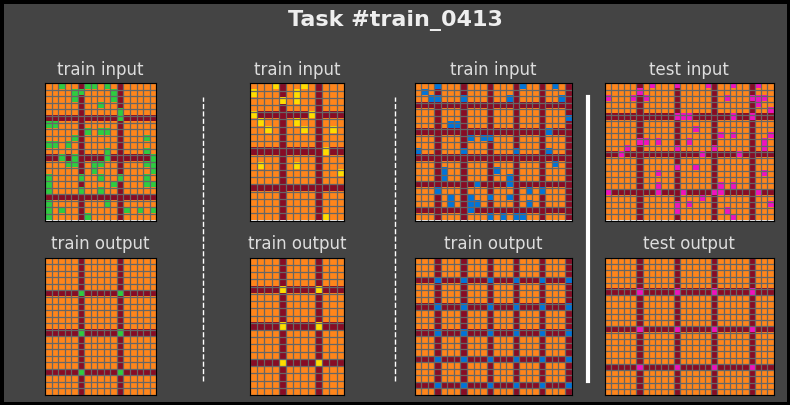

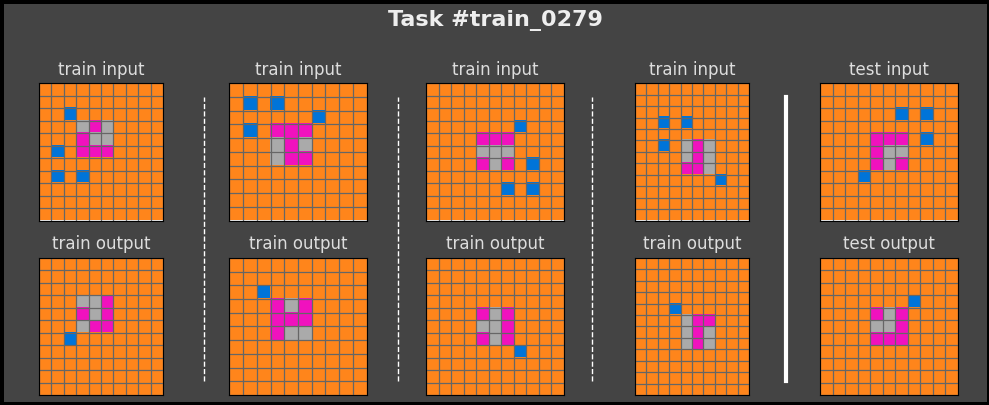

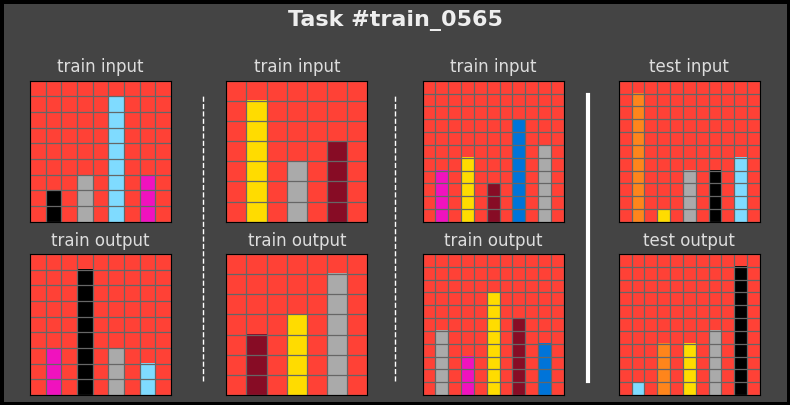

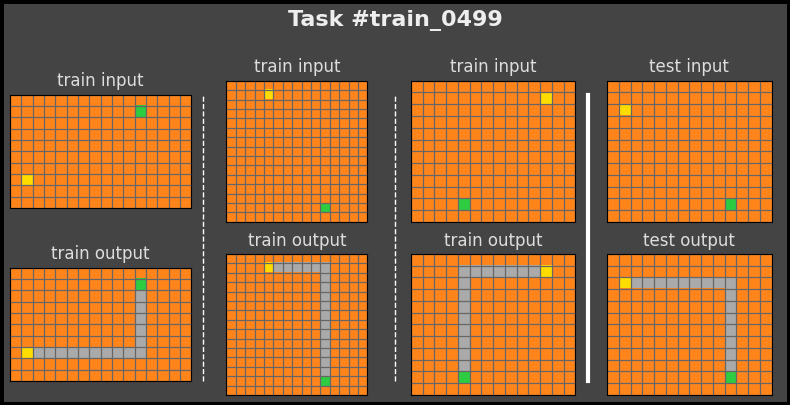

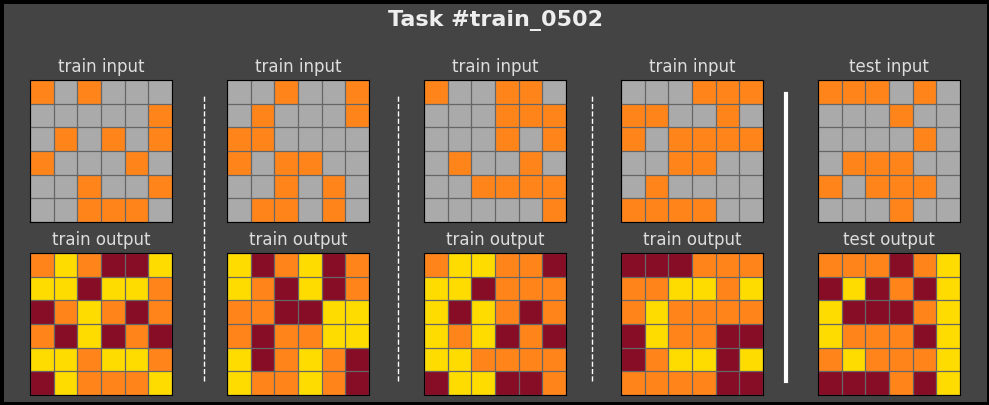

In [22]:
for i in range(10):
    task_id, task_data = sample_arc_task(train_data, split=None)
    visualize_task(task_data=task_data,task_id=task_id, size=2.0, w1=.9)

In [48]:
# Load sample submission to see the format
sample_submission = pd.read_csv(
    osp.join(Config.data_path, 'SampleSubmission.csv'),
    dtype={"row": str}
)

print(f"✓ Sample submission has {len(sample_submission)} predictions")

✓ Sample submission has 2303 predictions


In [49]:
sample_submission

,ID,row
0,test_0000_1,0000000000
1,test_0000_2,0000000000
2,test_0000_3,0000000000
3,test_0000_4,0000000000
4,test_0000_5,0000000000
...,...,...
2298,test_0184_6,0000000000
2299,test_0184_7,0000000000
2300,test_0184_8,0000000000
2301,test_0184_9,0000000000


In [50]:
preds = reconstruct_grids(sample_submission)
preds.keys() == test_data.keys()

True

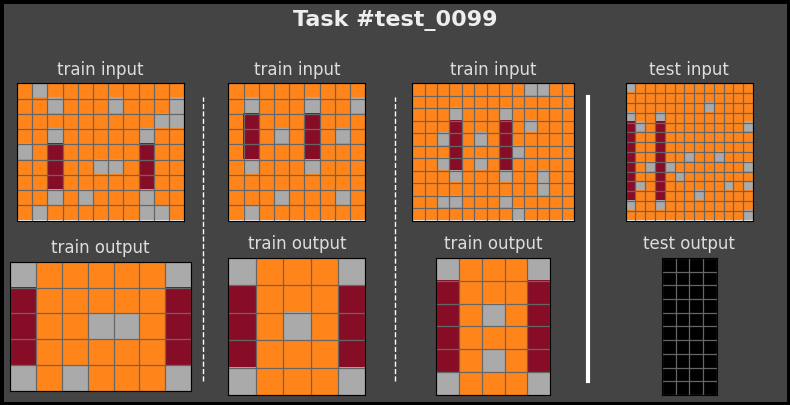

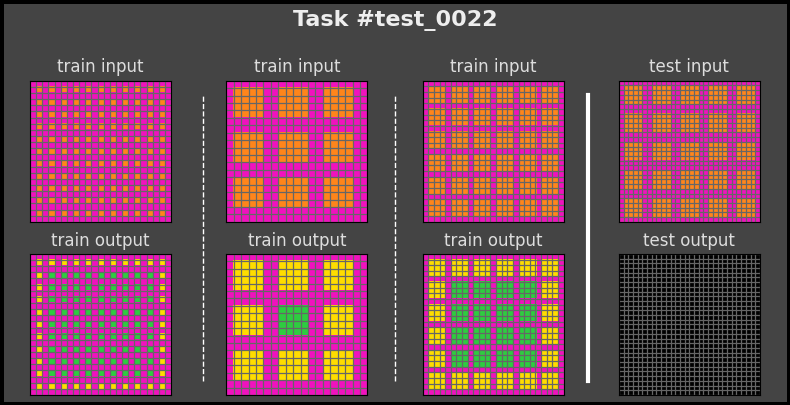

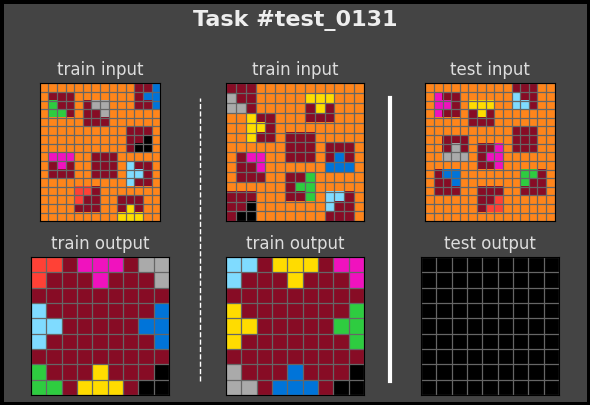

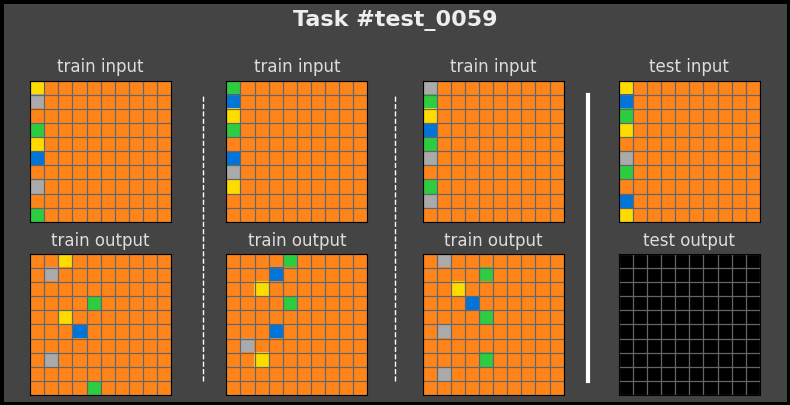

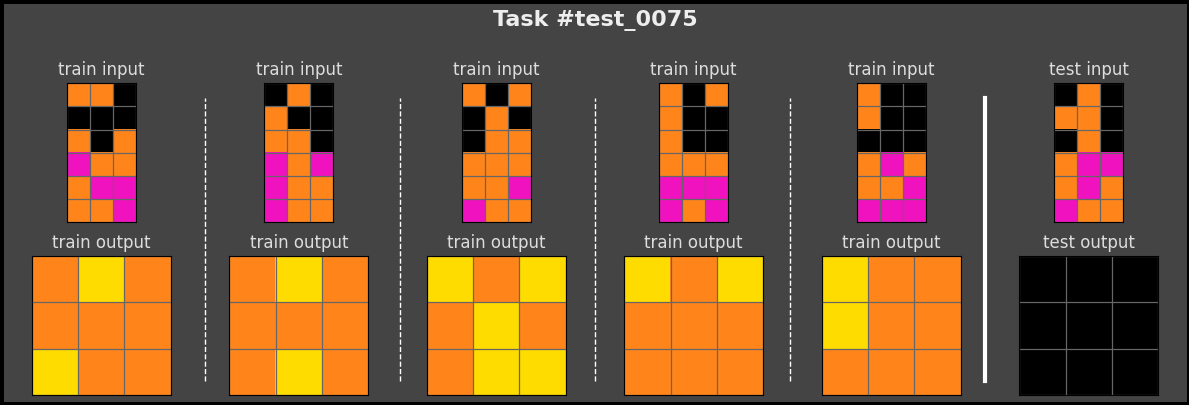

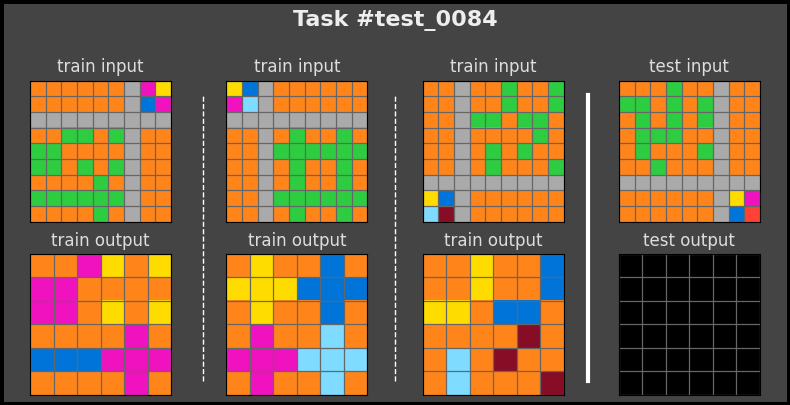

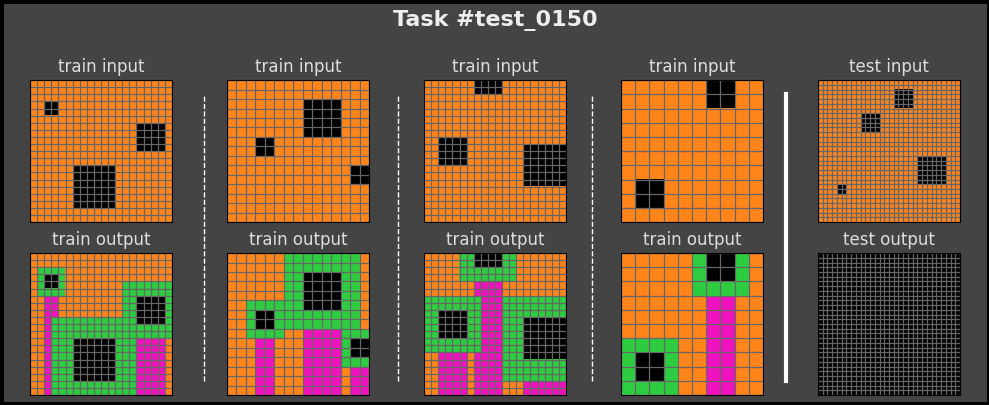

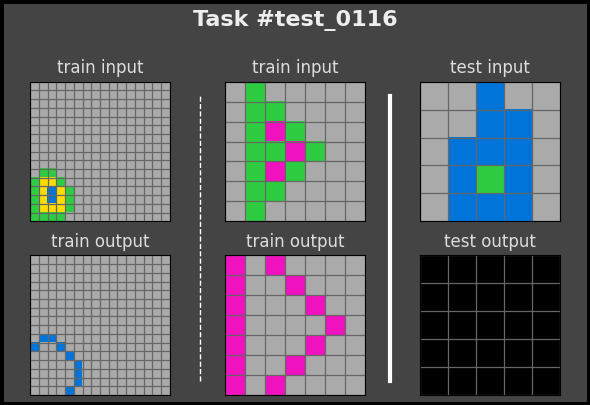

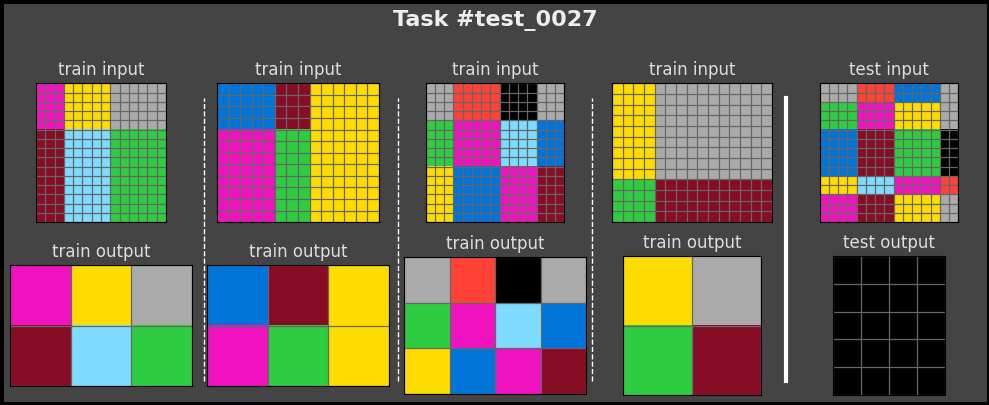

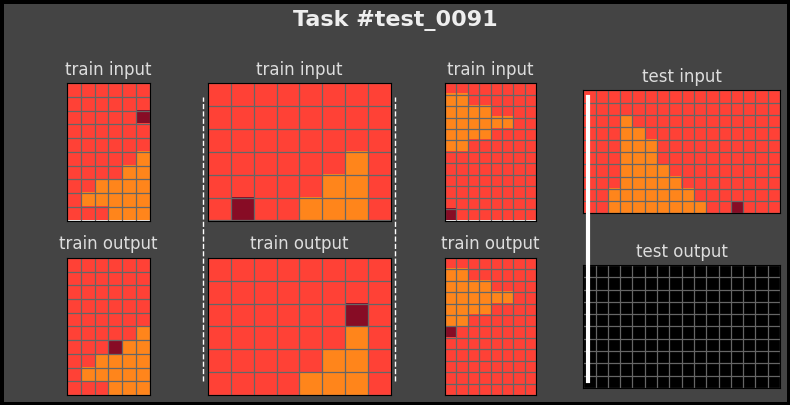

In [52]:
for i in range(10):
    task_id, task_data = sample_arc_task(test_data, split=None)    
    visualize_task(task_data=task_data,task_id=task_id, size=2.0, w1=.9, task_solutions=preds)

In [53]:
background_preds = []

for idx, row in sample_submission.iterrows():
    updated_pred = "7"*len(row.row)
    background_preds.append(updated_pred)

In [54]:
sample_submission["row"] = background_preds
sample_submission

,ID,row
0,test_0000_1,7777777777
1,test_0000_2,7777777777
2,test_0000_3,7777777777
3,test_0000_4,7777777777
4,test_0000_5,7777777777
...,...,...
2298,test_0184_6,7777777777
2299,test_0184_7,7777777777
2300,test_0184_8,7777777777
2301,test_0184_9,7777777777


In [55]:
preds = reconstruct_grids(sample_submission)

In [56]:
preds.keys() == test_data.keys()

True

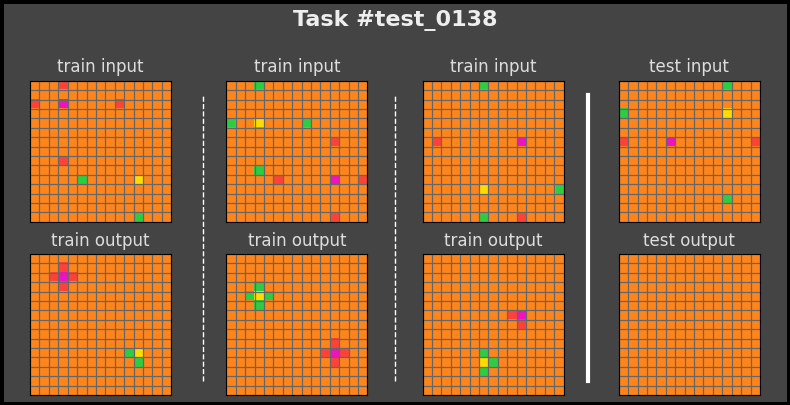

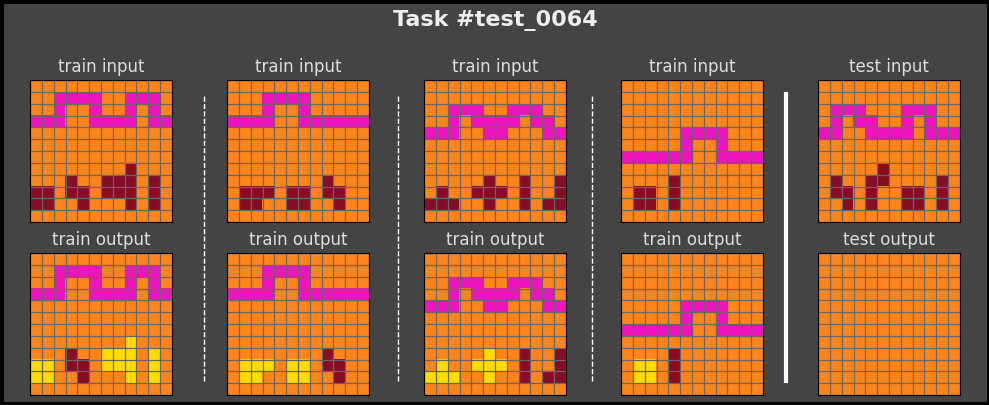

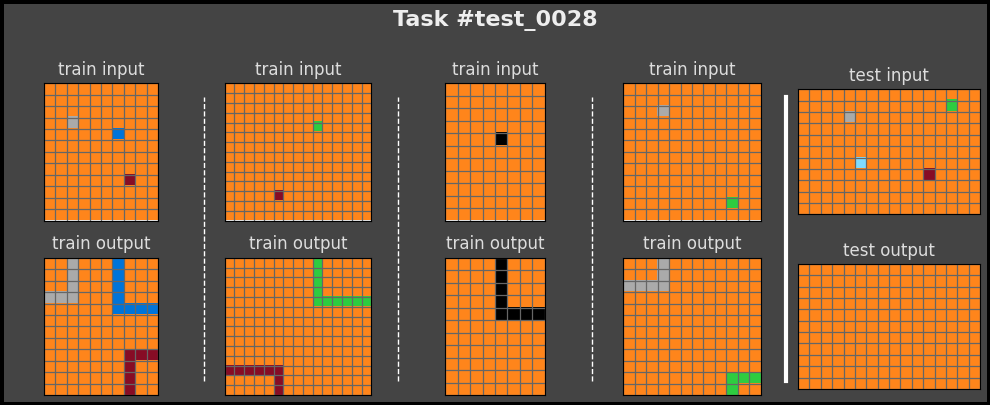

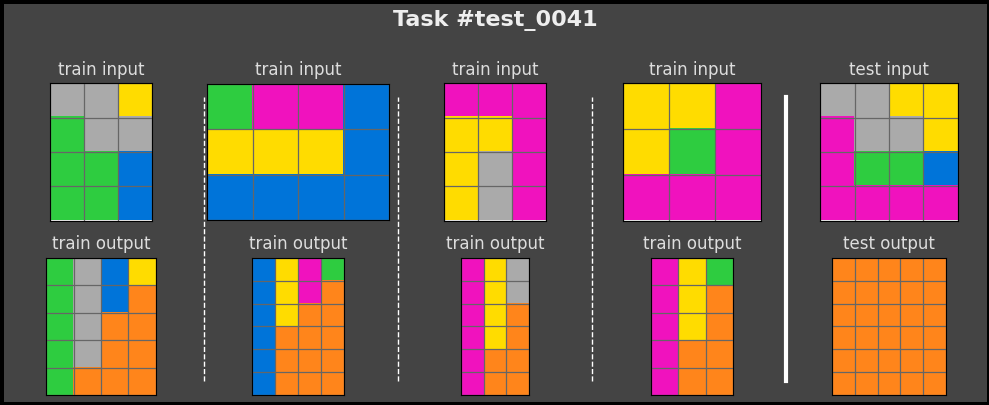

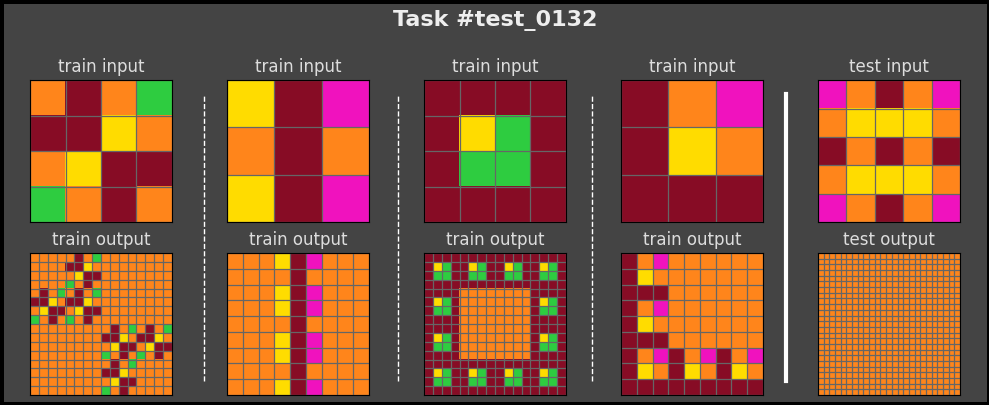

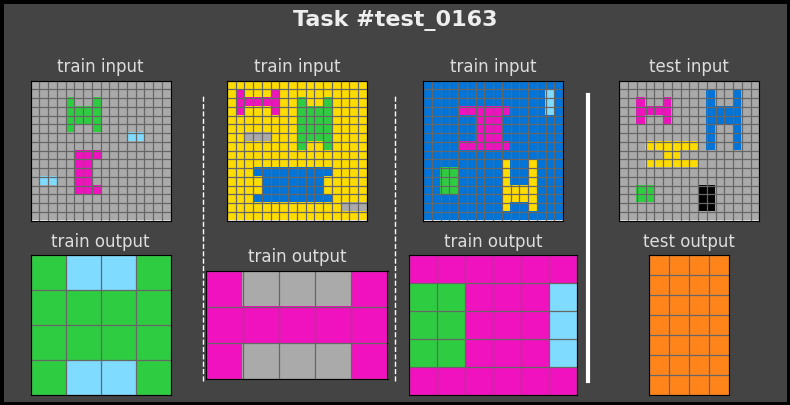

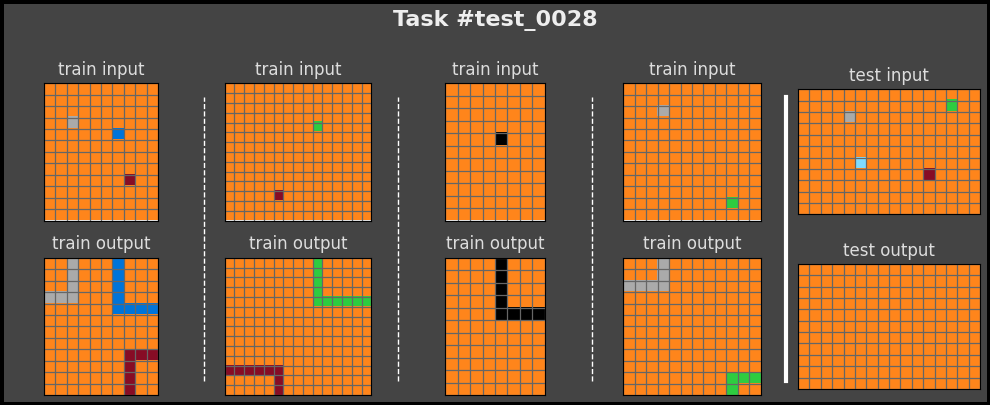

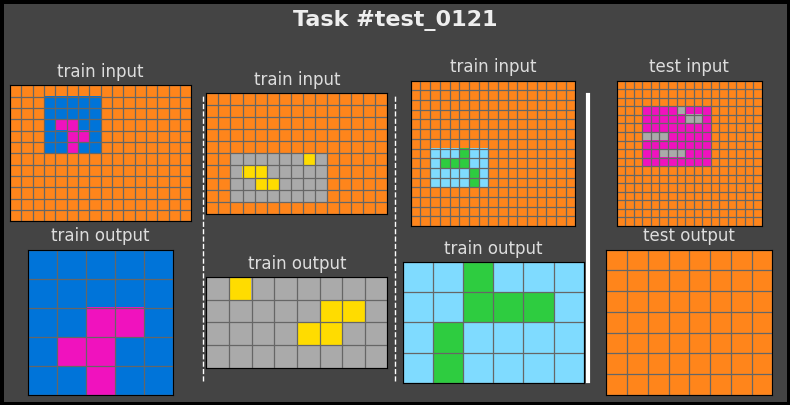

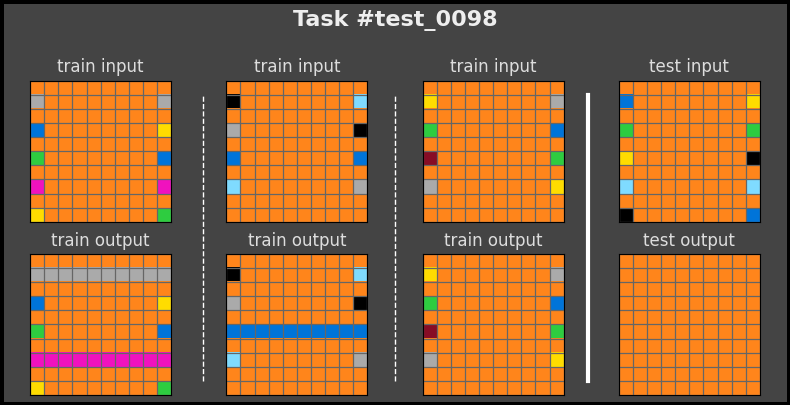

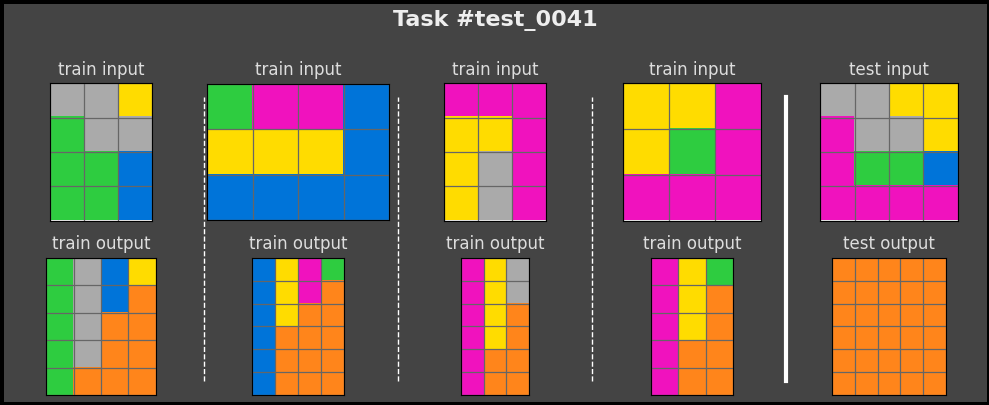

In [57]:
for i in range(10):
    task_id, task_data = sample_arc_task(test_data, split=None)    
    visualize_task(task_data=task_data,task_id=task_id, size=2.0, w1=.9, task_solutions=preds)

In [63]:
# sample_submission.to_csv(osp.join(Config.submission_path, "orange_background_sample_submission_only.csv"), index=False)

In [58]:
max_rows = get_row_sizes(sample_submission)

max_rows

,prefix,suffix
0,test_0000,10
1,test_0001,12
2,test_0002,10
3,test_0003,8
4,test_0004,30
...,...,...
180,test_0180,25
181,test_0181,10
182,test_0182,19
183,test_0183,10


In [59]:
adjusted_background_pixels = []

for idx, r in max_rows.iterrows():
    nrows = r.suffix
    adjusted_pixels = "7"*nrows
    
    # simulating nrows columnss
    for col in range(nrows):
        adjusted_background_pixels.append(adjusted_pixels)
        

In [61]:
len(sample_submission.row.tolist()) == len(adjusted_background_pixels)

True

In [62]:
sample_submission["row"] = adjusted_background_pixels

sample_submission

,ID,row
0,test_0000_1,7777777777
1,test_0000_2,7777777777
2,test_0000_3,7777777777
3,test_0000_4,7777777777
4,test_0000_5,7777777777
...,...,...
2298,test_0184_6,7777777777
2299,test_0184_7,7777777777
2300,test_0184_8,7777777777
2301,test_0184_9,7777777777


In [63]:
preds = reconstruct_grids(sample_submission)

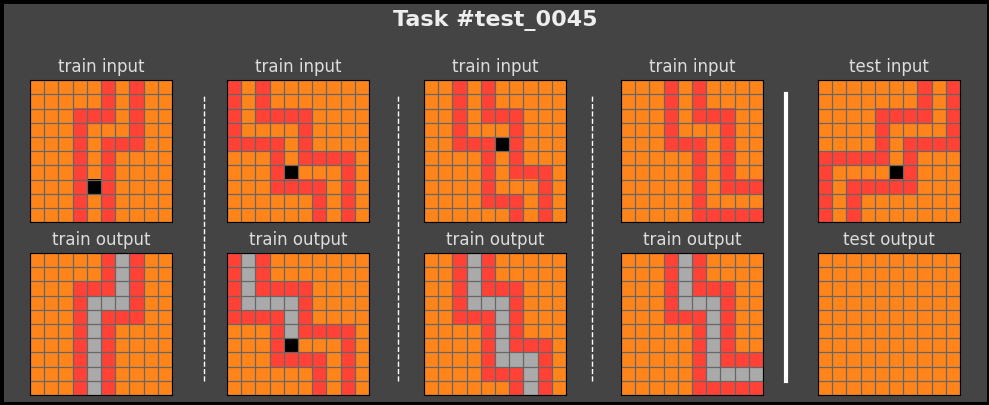

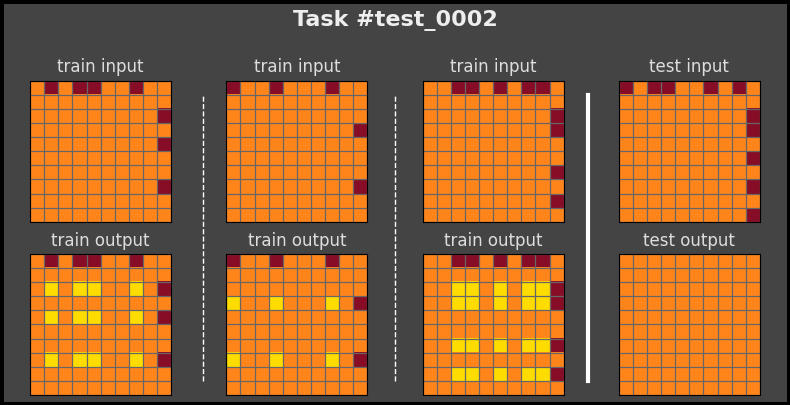

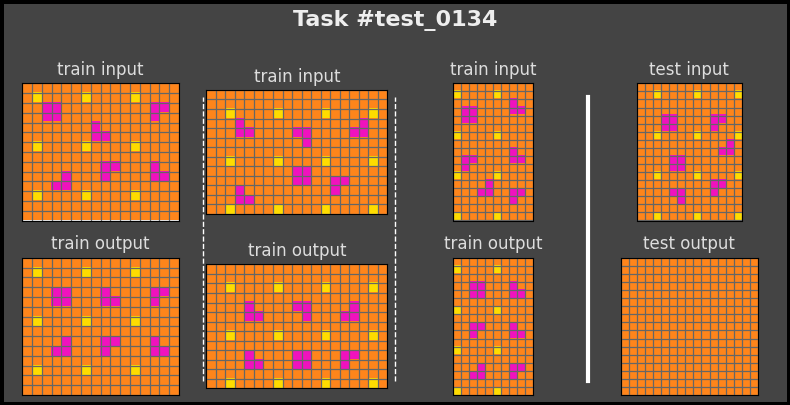

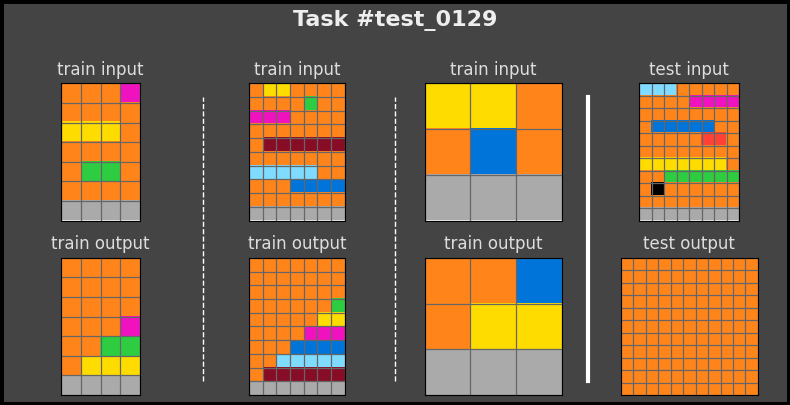

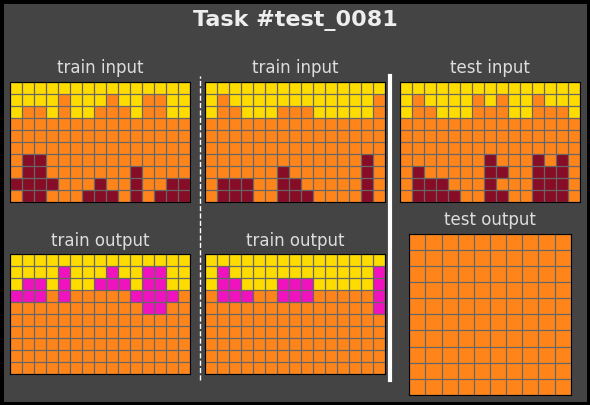

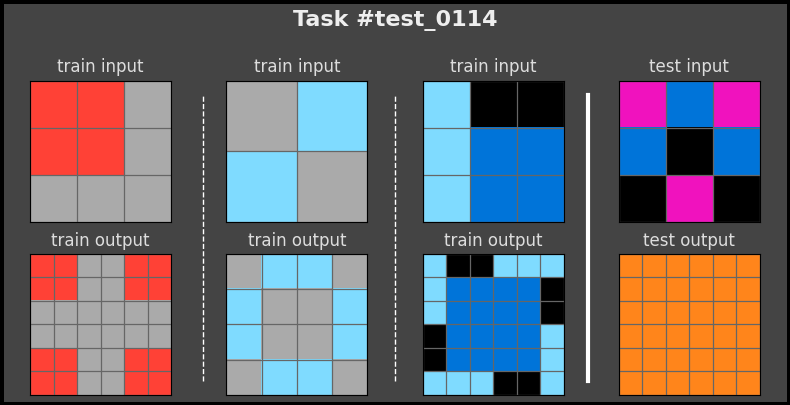

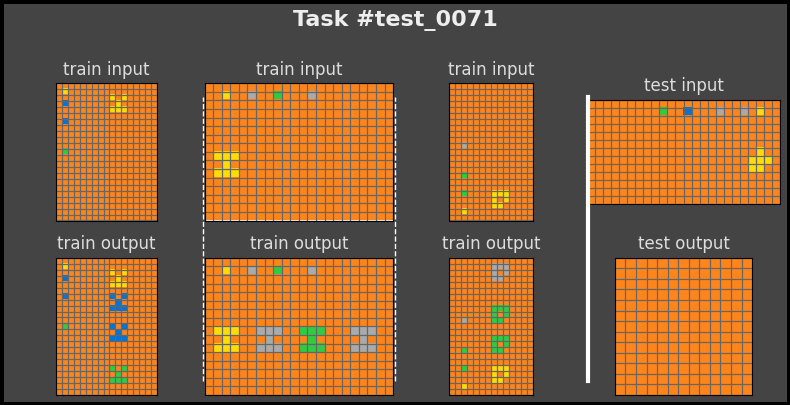

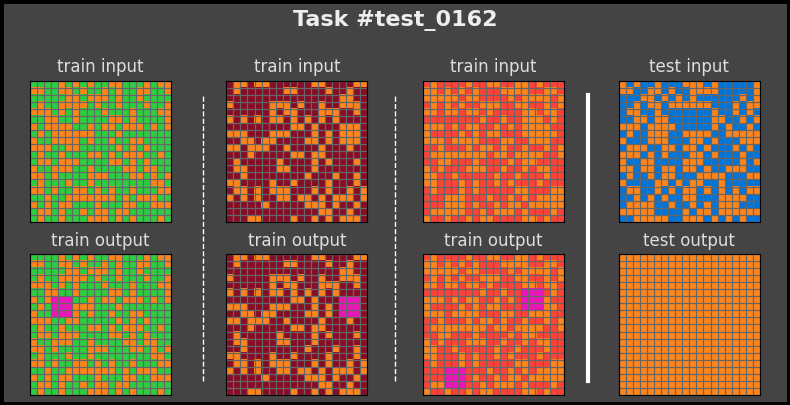

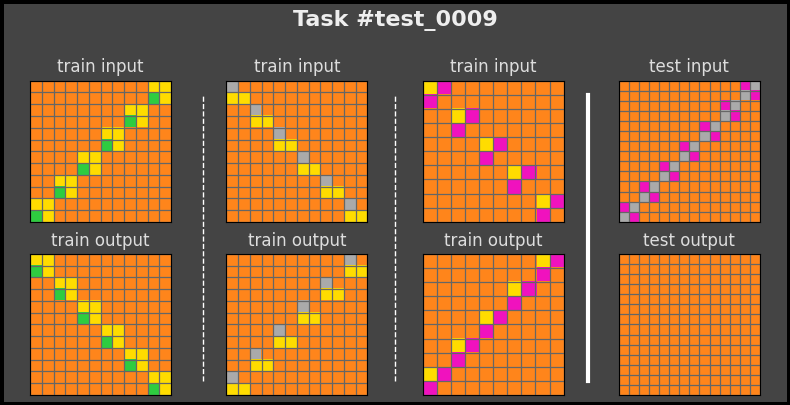

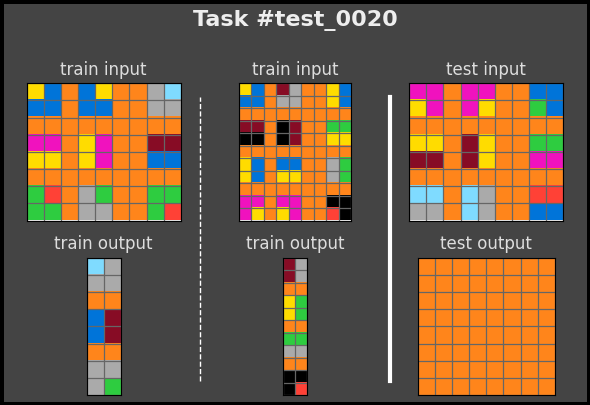

In [64]:
for i in range(10):
    task_id, task_data = sample_arc_task(test_data, split=None)    
    visualize_task(task_data=task_data,task_id=task_id, size=2.0, w1=.9, task_solutions=preds)

In [165]:
#sample_submission.to_csv(osp.join(Config.submission_path, "orange_background_lazy_solver_adjusted.csv"), index=False)